### Author: Hoang Chu

### Imports

In [121]:
%pip install -r dependencies.txt

INFO: pip is looking at multiple versions of qtpy to determine which version is compatible with other requirements. This could take a while.
  Using cached QtPy-2.3.0-py3-none-any.whl (83 kB)
INFO: pip is looking at multiple versions of qtconsole to determine which version is compatible with other requirements. This could take a while.
  Using cached qtconsole-5.4.0-py3-none-any.whl (121 kB)
INFO: pip is looking at multiple versions of pyzmq to determine which version is compatible with other requirements. This could take a while.
  Using cached pyzmq-25.0.0-cp310-cp310-macosx_10_15_universal2.whl (1.8 MB)
INFO: pip is looking at multiple versions of pyyaml to determine which version is compatible with other requirements. This could take a while.
  Using cached PyYAML-6.0-cp310-cp310-macosx_11_0_arm64.whl (173 kB)
INFO: pip is looking at multiple versions of pytz to determine which version is compatible with other requirements. This could take a while.
  Using cached pytz-2023.3-py2.py

In [122]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import requests
import scipy
import importlib
import helper, consts
importlib.reload(consts)
importlib.reload(helper)
import glob

### CONSTANTS

In [123]:
ROW = consts.ROW
COL = consts.COL
RAW_DATA_PATH = consts.RAW_DATA_PATH
RESPONSE_NAME = consts.RESPONSE_NAME

RESPONSE_NAME

'tonight'

### Quick Functions

In [124]:
does_sub_df_has_Nan = lambda df, col_name: df[[col_name]].isna().any(axis=COL)

### Read data

In [125]:
# local read

  
folder_path = '../data/training_data'
file_list = glob.glob(folder_path + "/*.csv") 
main_df = pd.DataFrame(pd.read_csv(file_list[0])) 
for i in range(1,len(file_list)): 
    df = pd.read_csv(file_list[i]) 
    # df = pd.DataFrame(data) 
    main_df = pd.concat([main_df,df],axis=0) 

# df = pd.concat(map(pd.read_csv,glob.glob(folder_path + '/*.csv')))

#data_20191202_1200_df = pd.read_csv(RAW_DATA_PATH + "data_20191202_1200.csv")
#data_20191203_1200_df = pd.read_csv(RAW_DATA_PATH + "data_20191203_1200.csv")

In [126]:
main_df.shape


(313062, 252)

In [127]:
# predicting df

data_20150602_1200_df = pd.read_csv(RAW_DATA_PATH + "/data.20150602_1200.csv")

### Feature Selection

##### Preliminary check

In [128]:
main_df.shape

(313062, 252)

In [129]:
data_20150602_1200_df.shape

(3146, 252)

In [130]:
print(f"20191202:")
main_df.info()
print(f"Columns with NaN: {main_df[main_df.isna().any(axis=COL)]}")

print()

print(f"20191203:")
data_20150602_1200_df.info()
print(f"Columns with NaN: {data_20150602_1200_df[data_20150602_1200_df.isna().any(axis=COL)]}")

20191202:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 313062 entries, 0 to 3118
Columns: 252 entries, eqid to tr_toxhr_0
dtypes: float64(251), int64(1)
memory usage: 604.3 MB
Columns with NaN: Empty DataFrame
Columns: [eqid, wt, today, tonight, tmwam, dn3sttmwmd, dn1, dn4x1, cftorrrelstd_open_0, liqlog_open_0, llirpnxm_am_1, llirpnxm_dy_12to16, llirpnxm_dy_17to21, llirpnxm_dy_1to3, llirpnxm_dy_4to6, llirpnxm_dy_7to11, llirpnxm_lst15_0, llirpnxm_lsthrx15_0, llirpnxm_md_1, llirpnxm_nt_0, llirpnxm_nt_1, llirpnxm_nt_12to16, llirpnxm_nt_17to21, llirpnxm_nt_1to3, llirpnxm_nt_4to6, llirpnxm_nt_7to11, llirpnxm_pm_1, llirpnxm_toxhr_0, mocrelvol_open_1, mocrelvol_open_13to17, mocrelvol_open_18to22, mocrelvol_open_2to4, mocrelvol_open_5to7, mocrelvol_open_8to12, momr10d_open_0, momr50dx10d_open_0, moorelvol_open_0, moorelvol_open_12to16, moorelvol_open_17to21, moorelvol_open_1to3, moorelvol_open_4to6, moorelvol_open_7to11, nnetticksrelmultstdev_am_1, nnetticksrelmultstdev_dy_12to16, nnettic

In [131]:
print(f"20191202 - unique eqid count: {main_df.eqid.nunique()}")
print(f"20191203 - unique eqid count: {data_20150602_1200_df.eqid.nunique()}")

20191202 - unique eqid count: 3376
20191203 - unique eqid count: 3146


In [132]:
main_df.drop('eqid', axis=COL, inplace=True)
data_20150602_1200_df.drop('eqid', axis=COL, inplace=True)

In [133]:
print(f"training set:")
main_df.describe().loc[['min', 'max']]

training set:


,wt,today,tonight,tmwam,dn3sttmwmd,dn1,dn4x1,cftorrrelstd_open_0,liqlog_open_0,llirpnxm_am_1,...,tr_md_1,tr_nt_0,tr_nt_1,tr_nt_12to16,tr_nt_17to21,tr_nt_1to3,tr_nt_4to6,tr_nt_7to11,tr_pm_1,tr_toxhr_0
min,0.000015,-0.093743,-0.118355,-0.082232,-0.406343,-0.217713,-0.413634,-2.029335,-3.422019,-0.030027,...,-0.181246,-0.248395,-0.248395,-0.262104,-0.262104,-0.248395,-0.248395,-0.262104,-0.160350,-0.198276
max,0.003904,0.102819,0.151392,0.092196,0.325323,0.215648,0.331000,2.498018,1.810317,0.031884,...,0.249656,0.364367,0.364367,0.527026,0.527026,0.511446,0.511446,0.527026,0.289527,0.236002


In [134]:
print(f"20150602:")
data_20150602_1200_df.describe().loc[['min', 'max']]

20150602:


,wt,today,tonight,tmwam,dn3sttmwmd,dn1,dn4x1,cftorrrelstd_open_0,liqlog_open_0,llirpnxm_am_1,...,tr_md_1,tr_nt_0,tr_nt_1,tr_nt_12to16,tr_nt_17to21,tr_nt_1to3,tr_nt_4to6,tr_nt_7to11,tr_pm_1,tr_toxhr_0
min,0.000016,-0.045065,-0.052672,-0.042489,-0.203398,-0.099692,-0.2117,-1.606556,-3.331233,-0.007814,...,-0.064435,-0.072432,-0.218679,-0.242618,-0.236863,-0.218679,-0.185715,-0.151686,-0.023336,-0.079471
max,0.001342,0.057321,0.066898,0.069924,0.223958,0.164918,0.2377,2.501099,1.580095,0.012865,...,0.120576,0.053742,0.277050,0.235876,0.267265,0.532310,0.176683,0.364367,0.073329,0.077337


In [135]:
RESPONSE_NAME

'tonight'

##### Get the responses columns

In [136]:
training_responses = main_df[RESPONSE_NAME]
testing_responses = data_20150602_1200_df[RESPONSE_NAME]

##### 20191202_1200 data

In [137]:
main_df.drop(RESPONSE_NAME, axis=COL, inplace=True)

In [138]:
main_df.corr().isna().sum()

wt             7
today          7
tmwam          7
dn3sttmwmd     7
dn1            7
              ..
tr_nt_1to3     7
tr_nt_4to6     7
tr_nt_7to11    7
tr_pm_1        7
tr_toxhr_0     7
Length: 250, dtype: int64

Some column pairs have NaN correlations, meaning either or both columns have constant values in all rows.

In [139]:
# Get columns where all rows have the same value
constVal_columns = main_df.columns[main_df.apply(lambda x: x.nunique() == 1)]
constVal_columns

Index(['rvdelta_nt_0', 'rvdelta_nt_1', 'rvdelta_nt_12to16',
       'rvdelta_nt_17to21', 'rvdelta_nt_1to3', 'rvdelta_nt_4to6',
       'rvdelta_nt_7to11'],
      dtype='object')

In [140]:
TOBE_REMOVED_20191202_1200_COLUMNS = list(constVal_columns)

##### 20191203_1200 data

In [141]:
data_20150602_1200_df.drop(RESPONSE_NAME, axis=COL, inplace=True)

In [142]:
data_20150602_1200_df.corr().isna().sum()

wt             7
today          7
tmwam          7
dn3sttmwmd     7
dn1            7
              ..
tr_nt_1to3     7
tr_nt_4to6     7
tr_nt_7to11    7
tr_pm_1        7
tr_toxhr_0     7
Length: 250, dtype: int64

In [143]:
# Get columns where all rows have the same value
constVal_columns = data_20150602_1200_df.columns[data_20150602_1200_df.apply(lambda x: x.nunique() == 1)]
constVal_columns

Index(['rvdelta_nt_0', 'rvdelta_nt_1', 'rvdelta_nt_12to16',
       'rvdelta_nt_17to21', 'rvdelta_nt_1to3', 'rvdelta_nt_4to6',
       'rvdelta_nt_7to11'],
      dtype='object')

In [144]:
TOBE_REMOVED_20191203_1200_COLUMNS = list(constVal_columns)

##### Get training_predictors_df and testing_predictors_df

In [145]:
TOBE_REMOVED_20191202_1200_COLUMNS_set = set(TOBE_REMOVED_20191202_1200_COLUMNS)
TOBE_REMOVED_20191203_1200_COLUMNS_set = set(TOBE_REMOVED_20191203_1200_COLUMNS)

In [146]:
# Appear in TOBE_REMOVED_20191202_1200_COLUMNS_set but not in TOBE_REMOVED_20191203_1200_COLUMNS_set
print(TOBE_REMOVED_20191202_1200_COLUMNS_set - TOBE_REMOVED_20191203_1200_COLUMNS_set)

set()


In [147]:
# Appear in TOBE_REMOVED_20191203_1200_COLUMNS_set but not in TOBE_REMOVED_20191202_1200_COLUMNS_set
print(TOBE_REMOVED_20191203_1200_COLUMNS_set - TOBE_REMOVED_20191202_1200_COLUMNS_set)

set()


In [148]:
remove_20191202_stay_20191203_columns = list(TOBE_REMOVED_20191202_1200_COLUMNS_set - TOBE_REMOVED_20191203_1200_COLUMNS_set)
data_20150602_1200_df[remove_20191202_stay_20191203_columns].describe()

ValueError: Cannot describe a DataFrame without columns

In [ ]:
TOBE_REMOVED_COLUMNS = TOBE_REMOVED_20191202_1200_COLUMNS

Since there are variances among those columns, I don't think removing them now benefits the model.

In [149]:
data_20191202_1200_working_df = main_df.drop(TOBE_REMOVED_COLUMNS, axis=COL)
data_20191203_1200_working_df = data_20150602_1200_df.drop(TOBE_REMOVED_COLUMNS, axis=COL)

In [150]:
'rrirpnxm_nt_0' in main_df.columns

True

Rosy: we will not remove the columns right now from above, instead, we will just select the predictor columns we want to use

In [151]:
trainig_working_df =  main_df[['rrirpnxm_nt_0','rrirpnxm_lst15_0','rrirpnxm_toxhr_0','rrirpnxm_lsthrx15_0']].copy()
testing_working_df = data_20150602_1200_df[['rrirpnxm_nt_0','rrirpnxm_lst15_0','rrirpnxm_toxhr_0','rrirpnxm_lsthrx15_0']].copy()


In [153]:
print(f"1% negative correlations ranking: {sorted(trainig_working_df.corr().quantile(0.1), reverse=True)}")
print(f"99% negative correlations ranking: {sorted(trainig_working_df.corr().quantile(0.9), reverse=True)}")
trainig_working_df.corr().describe()

1% negative correlations ranking: [-0.026337353257707672, -0.04019955508023097, -0.04439439460955513, -0.05748794795245137]
99% negative correlations ranking: [0.7005948886521882, 0.7005948886521882, 0.7001292925755167, 0.6968784110848756]


,rrirpnxm_nt_0,rrirpnxm_lst15_0,rrirpnxm_toxhr_0,rrirpnxm_lsthrx15_0
count,4.000000,4.000000,4.000000,4.000000
mean,0.234702,0.239603,0.220694,0.231013
std,0.511113,0.507140,0.519999,0.512998
min,-0.063605,-0.033165,-0.063605,-0.043214
25%,-0.015578,-0.016095,-0.048312,-0.035678
50%,0.001207,-0.004211,-0.026810,-0.016367
75%,0.251487,0.251487,0.242196,0.250323
max,1.000000,1.000000,1.000000,1.000000


In [154]:
training_predictors_df = trainig_working_df.copy()
testing_predictors_df = testing_working_df.copy()

In [155]:
sorted(training_predictors_df.quantile(0.25) / training_predictors_df.quantile(0.01), reverse=True)[:2]

[0.16852336378566388, 0.16111665004985046]

In [156]:
sorted(training_predictors_df.quantile(0.99) / training_predictors_df.quantile(0.75), reverse=True)[:2]

[7.271177970423268, 6.796835970024979]

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00,
        0.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        1.3000e+01, 9.0000e+00, 1.9000e+01, 1.4000e+01, 1.6000e+01,
        3.2000e+01, 2.5000e+01, 2.6000e+01, 4.7000e+01, 8.0000e+01,
        9.0000e+01, 1.3100e+02, 1.8200e+02, 2.5000e+02, 3.2100e+02,
        4.3900e+02, 6.0600e+02, 8.2200e+02, 1.1250e+03, 1.5070e+03,
        2.2020e+03, 3.0450e+03, 4.3550e+03, 6.6710e+03, 1.0281e+04,
        1.6616e+04, 2.5478e+04, 3.8343e+04, 5.4474e+04, 4.5991e+04,
        3.4084e+04, 2.2064e+04, 1.3804e+04, 8.7820e+03, 5.8480e+03,
        4.0840e+03, 2.9060e+03, 2.1510e+03, 1.5300e+03, 1.2120e+03,
        8.5000e+02, 6.2300e+02, 4.6400e+02, 3.4000e+02, 2.7300e+02,
        1.9500e+02, 1.3000e+02, 1.1400e+02, 7.7000e+01, 6.8000e+01,
        5.3000e+01, 3.4000e+01, 4.2000e+01, 2.7000e+01, 1.8000e+01,
        1.5000e+01, 4.0000e+00, 1.2000e+01, 6.00

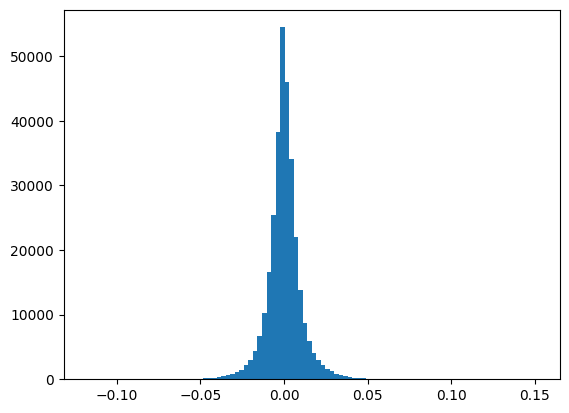

In [157]:
plt.hist(training_responses, bins=100)

#### Detect influential points

I will use Mahalanobis distance, which computes distances from the data's centre and create an oval boundary.

In [158]:
mean_vector = np.mean(training_predictors_df, axis=0)
cov_matrix = np.cov(training_predictors_df, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

In [159]:
mahalanobis_distances = []
for index, row in training_predictors_df.iterrows():
    mahalanobis_distance = scipy.spatial.distance.mahalanobis(row, mean_vector, inv_cov_matrix)
    mahalanobis_distances.append(mahalanobis_distance)

In [160]:
training_predictors_df['mahalanobis_dist'] = mahalanobis_distances
training_predictors_df.head()

,rrirpnxm_nt_0,rrirpnxm_lst15_0,rrirpnxm_toxhr_0,rrirpnxm_lsthrx15_0,mahalanobis_dist
0,0.009545,-0.003896,-0.003841,-0.003296,1.896631
1,-0.003190,-0.000876,0.008117,-0.000894,0.987792
2,-0.001437,-0.000091,-0.000974,0.000101,0.205839
3,-0.003030,0.000382,0.000696,0.000529,0.386368
4,-0.003135,-0.000855,-0.000542,-0.001793,0.585188


In [161]:
#TODO: Need discussion
mahal_threshold = 3 # Typical 'mahal_threshold' is 3
outlier_significance_val = .001

In [162]:
training_predictors_df['mahal_p_value'] = 1 - scipy.stats.chi2.cdf(training_predictors_df['mahalanobis_dist'], mahal_threshold)

In [163]:
outlier_condition = (training_predictors_df['mahal_p_value'] < outlier_significance_val)

In [164]:
nonOutlier_indices = training_predictors_df[~outlier_condition].index

In [165]:
temp_col = 'response'
training_predictors_df[temp_col] = training_responses

training_predictors_df = training_predictors_df[~outlier_condition]

training_responses = training_predictors_df[temp_col]
training_predictors_df.drop(temp_col, axis=COL, inplace=True)

In [166]:
training_predictors_df.drop(['mahalanobis_dist', 'mahal_p_value'], axis = COL, inplace=True)
training_predictors_df.reset_index(drop=True)
training_predictors_df.head()

,rrirpnxm_nt_0,rrirpnxm_lst15_0,rrirpnxm_toxhr_0,rrirpnxm_lsthrx15_0
0,0.009545,-0.003896,-0.003841,-0.003296
1,-0.003190,-0.000876,0.008117,-0.000894
2,-0.001437,-0.000091,-0.000974,0.000101
3,-0.003030,0.000382,0.000696,0.000529
4,-0.003135,-0.000855,-0.000542,-0.001793


#### Merge features and responses

In [167]:
train_df = pd.concat([training_predictors_df, pd.DataFrame({consts.RESPONSE_NAME: training_responses})], 
                     axis=COL)
test_df = pd.concat([testing_predictors_df, pd.DataFrame({consts.RESPONSE_NAME: testing_responses})], 
                    axis=COL)

### Output

In [168]:
out_path = '../data/cleaned_data/'

In [169]:
out_train_filename = 'training_data.csv'
out_test_filename = 'testing_data.csv'

In [170]:
train_df.to_csv(out_path + out_train_filename, index=False)
test_df.to_csv(out_path + out_test_filename, index=False)

In [171]:
%pip freeze > dependencies.txt

Note: you may need to restart the kernel to use updated packages.
